# Data Description 

In [1]:
## Run this cell containing needed libraries 
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_data <- read_csv("players.csv") |>
    glimpse()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [3]:
sessions_data <- read_csv("sessions.csv") |>
    glimpse()

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


## Comments on Data 

After Loading in the data and getting a glimpse of it, some comments and observations about it can be made. One of these is the number of variables, their type and what data frame they came from. **Table 1.** compiles all information on variables 

**Table 1: Variable Names and Types**

| Variable Name   | Variable Type | Origin Data Frame |
| :---------------- | :------: |  :----:
| experience         |   character   | players |
| hashedEmail           |   character   | players + sessions |
| name     |  character   | players |
| gender  |  character   | players |
| played_hours         |   double   | players |
| age           |   double   | players |
| start_time     |  character   | sessions |
| end_time  |  character   | sessions |
| original_start_time           |   double   | sessions|
| original_end_time     |  double   | sessions |
| subscribe     |  logical   | players |


Looking at the table, "hashedEmail" is seen across both data frames. This is a special variable because it is the idenitfier for a player who has played a session on the server. Variables from the "Player" data frame contain player information like gender, age etc. Meanwhile, variables from the "Session" data frame contain session information like start and end time. 

Another important comment is the number of observations in each data frame. **Table 2.** compiles all information on observations. 

| Data Frame              | # of Observations |
| :---------------- | :------: |
|  Players        |   196   | 
| Sessions           |   1,535   |

The number of observations in the "players" data frame can be interpreted as the number of players, so 196 players have participated in the research project. Meanwhile, the number of observations in the "sessions" data frame can be interpreted as the number of sessions played. This means the 196 players played a total of 1,535 sessions on the minecraft server. 




### Summary Statistics

Summary statistics can be calculated for each quantitative variable and each data frame. These include minimum, maximum values, mean and count. What type of summary statistic used is dictated by variable type. 

In [4]:
players_smry <- players_data |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE) |>
    round(2)
players_smry


played_hours,Age
<dbl>,<dbl>
5.85,21.14


For the "players" data, the average age of a player is 21.14 years while the average hours played is 5.85 hours.

In [5]:
sessions_smry <- sessions_data |>
    select(original_start_time,original_end_time) |>
    map_dfr(mean, na.rm = TRUE) |>
    mutate(across(everything(), ~sprintf('%.2e', .)))
sessions_smry

original_start_time,original_end_time
<chr>,<chr>
1.72e+12,1.72e+12


For the "sessions" data, the means of both original start and end time are identical. This means that all players played around the same window of time.

### Issues with Data

Looking at the data, the "players" data frame is tidy because each column is one variable and each row is one observation. One issue seen is related to the "sessions" data frame, the original start and end time variables have values that are identical to one another. In order to fix this, the two variables can be transformed using mutate across into the duration of a session instead of the specific end and start times that are not readable. This keeps the benefit of being able to use the values in calculations and equations. Another issue is that the Age variable is expressed as a double variable even when it should be expressed as an integer. 

# Questions

After looking into the data, I have chosen to address **Question 2**. A more specific question could include some exploratory and response variables. Can Age and Experience predict played hours in the "players" data set? This helps answer question 2 by predicting what type of player profile would most likely play the most on the server, giving the most data. 

In order to do this, the categorical variable, Experience must be transformed into dummy variables. This makes it so that the categorical variable can be used as a predictor.

# Exploratory Data Analysis and Visualization


The dataset **"players.csv"** was loaded into R through a URL at the start of the **Data Description** section. 

The mean of the quantitative variables has already been calculated in the **Summary Statistics** Section.

In order to better understand the data set, some visualizations can be made. A bar plot was made to compare amounts of hours played between experiences. 

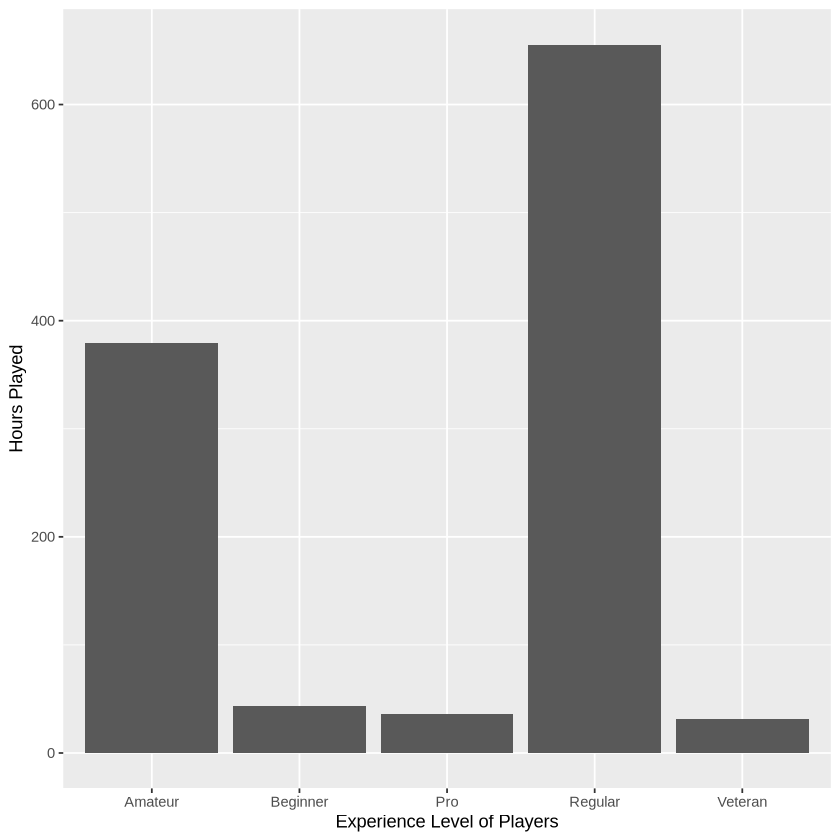

In [13]:
players_bar <- players_data |> 
    ggplot(aes(x = experience, y = played_hours)) +
            geom_bar(stat= "identity") +
           labs(x = "Experience Level of Players", y = "Hours Played")
players_bar

Looking at the visualization, Regular and Amateur players contribute the most played hours. This visualization does not take into account that there might just be more amateur and regular players than not. In order to see which experience level contibutes the most per player more wrangling and analysis is needed. In general, the visualisation shows that experience can be a predictor 

Next, a scatter plot was made to see the relationship between Age and hours played. Note that the "played_hours" data was put under a log scale in order for the data to be more normally distributed. 

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


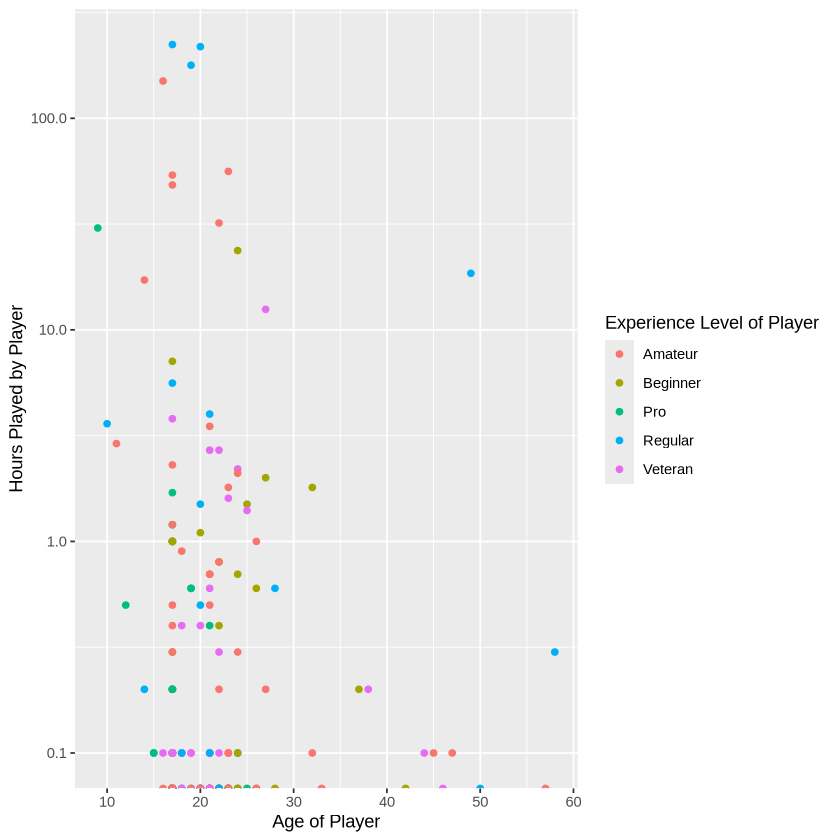

In [8]:
players_scatter <- players_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(aes(colour = experience)) +
    scale_y_log10() + 
    labs(x = "Age of Player", y = "Hours Played by Player", color = "Experience Level of Player")
players_scatter

Looking at the scatter plot, the data points do not seem to follow any trend as they are spread out in a vertical manner. This shows that age is not really a good predictor for hours played. 

# Methods and Plan

In order to address this data set, multiple linear regression could be used. Regression is appropriate to use because a quantitative variable (played_hours) is the response variable. To add, linear regression provides better insights into the relationship between these variables compared to knn-regression because the trend is much more easily interpretable. 

The biggest limitation with this method is that it assumes that the data follows a linear trend. If the data turns out to follow a quadratic or different trend, the predictions would be very far from the real value. 

The model will be evaluated using RMSE, predicting the data it was trained with while measuring the goodness of fit. Next, the model will be evaluated using RMSPIE, predicting unseen data in its training data. The goal of these tests is to minimize RMSE and RMSPE in order to get more accurate predictions. 

In order to do this, the data must be split into training and testing data. A 80% and 20% split while stratifying played hours. There will be no need for a validation set as there is no need to tune anything unlike knn regression. For the same reason, there is no need to cross validation. 